<h1>Latent Dirichlet Allocation</h1>

LSI pozwala w pewnym sensie znajdowac kluczowe tematy w tekście i dla danego dokumentu określać najbliższy mu temat. Jest to podejście geometryczne. 

LDA jest podejściem probabilistycznym do modelowania tematów. Jest bardziej dokładny choć wolniejszy.

Bierzemy macierz częstości słów $W_i$ w dokumentach $D_i$:

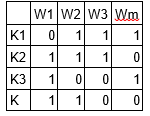

Załóżmy że mamy $k$ tematów. Każdy temat jest charakteryzowany słowami (jedne słowa pojawiają się częściej inne rzadziej). 

<h2>Częstości</h2>

Jeśli przejdziemy po dokumentach i przyporządkujemy każde słowo do określonego tematu, to powstaną 2 macierze

Dokument-temat

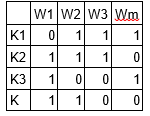

Temat-słowo

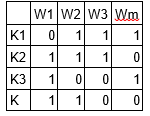

Mając powyższe macierze możemy policzyć prawdopodobieństwa:

-$p_1$ - przynależności dokumentu do tematu

-$p_2$ - przynależności słowa do tematu

LDA dąży do jak najlepszego przyporządkowania słów poszczególnych dokumentów do tematów (maksymalizowana jest funkcja wiarygodności).


<h2>Generatywność</h2>

Mając prawdopodobieństwa $p_1$, $p_2$ możemy wygeneraować dokument:

-wybieramy (losujemy) prawdopodobieństwo przynależności dokumentu do tematu (z $p_1$) - dokuemnt zawsze należy do wielu tematów

-generujemy słowa w dokumencie - najpierw losujemy do jakiego tematu należy słowo, a potem generujemy słowo z tego tematu $(z $p_2$)

<h2> Przykład</h2>

Let’s make an example. According to the above process, when generating some particular document D, you might

Pick 5 to be the number of words in D.
Decide that D will be 1/2 about food and 1/2 about cute animals.
Pick the first word to come from the food topic, which then gives you the word “broccoli”.
Pick the second word to come from the cute animals topic, which gives you “panda”.
Pick the third word to come from the cute animals topic, giving you “adorable”.
Pick the fourth word to come from the food topic, giving you “cherries”.
Pick the fifth word to come from the food topic, giving you “eating”.
So the document generated under the LDA model will be “broccoli panda adorable cherries eating” (note that LDA is a bag-of-words model).

<h2>Uczenie</h2>

1. Idziemy przez wszystkie słowa i wszystkie dokumentu i losowo przyporządkowujemy je do tematów.
2. Iteracyjnie idzemy: bierzemy dokuemnt $d$  i słowo $w$ i przyporządkowujemy je do najlepiej pasującego tematu - maksymalizującego $P(d|t)P(t|w)$
3. Po przejsciu przez wszystkie dokumenty aktualizujemy macierze i wracamy do punktu 2

Bierzemy korpus

In [2]:
from gensim import corpora, models
dictionary = corpora.Dictionary.load('tmp/deerwester.dict')
corpus = corpora.MmCorpus('tmp/deerwester.mm') # comes from the first tutorial, "From strings to vectors"
print(corpus)

C:\Users\user\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


MmCorpus(9 documents, 12 features, 28 non-zero entries)


Budujemy model LDA i transformujemy dane

In [3]:
model = models.LdaModel(corpus, id2word=dictionary, num_topics=2)
corpus_lda = model[corpus] # create a double wrapper over the original corpus: bow->tfidf->fold-in-lsi
for d in corpus_lda:
    print(d)

[(0, 0.13602643), (1, 0.86397356)]
[(0, 0.40377942), (1, 0.59622055)]
[(0, 0.14303932), (1, 0.85696065)]
[(0, 0.11303401), (1, 0.88696593)]
[(0, 0.83884501), (1, 0.16115502)]
[(0, 0.70216995), (1, 0.29783002)]
[(0, 0.80885631), (1, 0.19114368)]
[(0, 0.86016876), (1, 0.13983129)]
[(0, 0.8522082), (1, 0.14779183)]


Dla każdego dokumentu dostajemy prawdopodobieństwo przynależności dokumentu do danego tematu.

Możemy też zobaczyć z czego składają się tematy:

In [4]:
model.show_topics()

[(0,
  '0.140*"graph" + 0.125*"trees" + 0.115*"user" + 0.109*"minors" + 0.094*"response" + 0.084*"time" + 0.078*"survey" + 0.072*"system" + 0.060*"eps" + 0.049*"interface"'),
 (1,
  '0.171*"system" + 0.113*"human" + 0.104*"computer" + 0.097*"interface" + 0.086*"eps" + 0.080*"user" + 0.070*"trees" + 0.068*"survey" + 0.063*"time" + 0.056*"graph"')]

ZADANIE: Chcemy postortowac słowa każdego tematu i wybrać 5 najważniejszych - co można powiedzieć o tematach?

Proszę zobaczyć na funkcje typu get_topics(), get_term_topics(...): https://radimrehurek.com/gensim/models/ldamodel.html

In [5]:
import numpy as np
topics = np.argsort(model.get_topics()[0,:])[::-1] #::-1 sortowanie w odwrotnej kolejności
for x in topics[:5]:
    print(dictionary[x])

graph
trees
user
minors
response


ZADANIE: Proszę posortować zdania najbardziej pasujące do danego tematu. 

In [64]:
import gensim

# for d in corpus_lda:
#     print(d)
    
# for d in corpus_lda:
#     print(d[0])

#print(corpus_lda[0][0])

numpy_corpus = gensim.matutils.corpus2dense(corpus_lda, num_terms=2)
docs = np.argsort(numpy_corpus[0,:])[::-1]
for x in docs[:5]:
    print(corpus[x])
    
#trzeba by wypisać raczej zdania niż ich reprezentacje bag-of-words, ale tu nie mam dostepu do tekstu

[(9, 1.0), (10, 1.0), (11, 1.0)]
[(9, 1.0), (10, 1.0)]
[(0, 1.0), (1, 1.0), (2, 1.0)]
[(9, 1.0)]
[(3, 1.0), (6, 1.0), (7, 1.0)]


ZADANIE: Sprawdzić do jakiego tematu pasuje nowy dokument i jakie są mu najbliższe


In [73]:

doc = "Human computer interaction"

In [77]:
doc_rep = dictionary.doc2bow(doc.split(' '))

doc_assignments = model[doc_rep]
print(doc_assignments)

[(0, 0.45015991), (1, 0.54984009)]


Teraz trzebaby przygotować similarity query jak w LSI i zobaczyć wynik

W sklearn też jest LDA. Proszę spróbować samodzielnie użyć go i porównać wyniki z gensim

<h1>Wizualizacja modeli</h1>

Do wizualizacji użyjemy biblioteki pyLDAvis. instalujemy pyLDAvis: https://github.com/bmabey/pyLDAvis

In [83]:
import pyLDAvis.gensim

vis = pyLDAvis.gensim.prepare(model, corpus, dictionary)
pyLDAvis.display(vis)

Pytania które warto zadać: 

-jaki model jest dobry? powinny być interpretowalne, separowalne

-co znaczą te miary w ldavis?

Zastosowania: querowanie, rekomendacja, reprezentacja do klasyfiakcji

Na początek niech wezmą tutorial gensim, pobiorą dokument i stworzą reprezentację. Potem będziemy opowiadać o LDA

ZADANIA:

1. Mamy posty (tweety) użytkowników. Bierzemy jakiegoś użytkownika (zakładamy, że znamy dobrze jego zachowanie) i pytamy się, którzy użytkownicy są do niego podobni. Jeśli ich znajdziemy będziemy mogli im dedykować analogiczne reklamy i treści.

Rozw: można potraktować posty tego użytkownika jak query i wyszukać najbardziej podobne dokumenty innych użytkowników. Jeśli uzytkownicy mają dużo postów to trzeba jakąś miarę na zbiorach postów - dla prostoty porównujemy średnie, ale można też jakieś linkage functions z hierarchicznego wziąć.


2. Pytamy się o czym jest dany tekst. 

Rozw: Najprostsze rozwiązanie to znalezienie najczęstszych słów. Bardzej zaawansowane polega na wyszukaniu topiców (LSA albo LDA) - wtedy mamy niezależne topici.

3. Mamy podział na topici. Bierzemy użytkownika. Pytamy się którzy użytkownicy są do niego podobni biorąc pod uwagę tylko określony topic (na przykład pytamy sie którzy są podobni w kategorii sport. Zadanie możemy rozszerzyć na pytanie, którzy uyżytkownicy są do niego podobni biorąc pod uwagę kilka topiców na raz.

Rozw: Jeśli mamy topic albo topici to wystarczy zrzutować naszego użytkownika na tą podprzestrzeń. Tak samo robimy z innymi użytkownikami i szukamy najbliższych w tej podprzestrzeni.

4. Mamy podział na topici - które słowa charakteryzują najbardzie dany topic

Bierzemy te współrzędne (słowa) z największą normą z kolejnych wektorów własnych.

5. Jakie zdania najbardziej charakteryzują topic?

Jest to chyba opisane w https://towardsdatascience.com/nlp-for-topic-modeling-summarization-of-legal-documents-8c89393b1534 ale nie dokonca rozumiem. Jest tez notebook: https://github.com/chibueze07/Machine-Learning-In-Law/tree/master

6. Jakich osób (podmiotów) dotyczą topici. Trzeba zrobic POS i dla każdego podmiotu wyszukać podobieństwo do danego topicu. 


